<a href="https://colab.research.google.com/github/arulmr0/deeplearningpytorch/blob/main/NNIRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [65]:
#CREATING NN MODEL

class Model(nn.Module):
  def __init__(self, infeatures=4,h1=8,h2=9,output=3):
    super().__init__()
    self.fc1=nn.Linear(infeatures,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,output)
  def forward(self ,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.out(x))

    return x



In [66]:
torch.manual_seed(40)

model=Model()

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)

In [68]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [69]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [70]:
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)
x=my_df.drop('variety',axis=1)
y=my_df['variety']

x=x.values
y=y.values

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)

y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [72]:
criterian=nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [73]:
epochs=100

losses=[]

for i in range(epochs):
  y_pred=model.forward(x_train)

  loss=criterian(y_pred,y_train)

  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f'Epoch:{i} and Loss:{loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and Loss:1.1047557592391968
Epoch:10 and Loss:1.0932421684265137
Epoch:20 and Loss:1.0869182348251343
Epoch:30 and Loss:1.0824894905090332
Epoch:40 and Loss:1.0760101079940796
Epoch:50 and Loss:1.066685438156128
Epoch:60 and Loss:1.0567443370819092
Epoch:70 and Loss:1.048150897026062
Epoch:80 and Loss:1.0423201322555542
Epoch:90 and Loss:1.0396790504455566


Text(0, 0.5, 'loss')

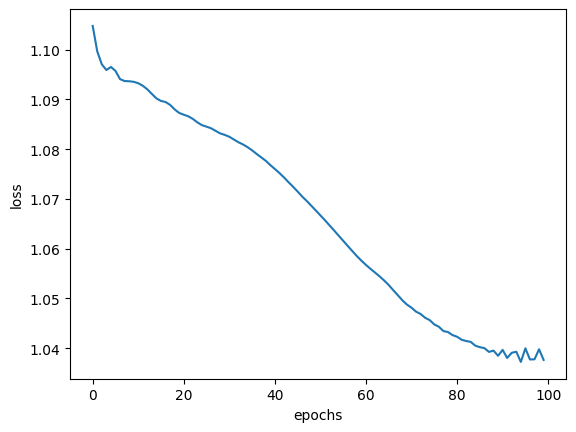

In [74]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')